<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/2_1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [54]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', parse_dates=['created'], index_col='created')
assert df.shape == (49352, 33)

In [55]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

## 1. Wrangle Data

### 1.1 EDA

In [56]:
print(df.shape)
df.head(2)

(48818, 33)


,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48818 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   description           47393 non-null  object 
 3   display_address       48685 non-null  object 
 4   latitude              48818 non-null  float64
 5   longitude             48818 non-null  float64
 6   price                 48818 non-null  int64  
 7   street_address        48808 non-null  object 
 8   interest_level        48818 non-null  object 
 9   elevator              48818 non-null  int64  
 10  cats_allowed          48818 non-null  int64  
 11  hardwood_floors       48818 non-null  int64  
 12  dogs_allowed          48818 non-null  int64  
 13  doorman               48818 non-null  int64  
 14  dishwasher            48818 non-nul

In [58]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [68]:
df['total rooms'] = df['bathrooms'] + df['bedrooms']

### 1.2 Visualize

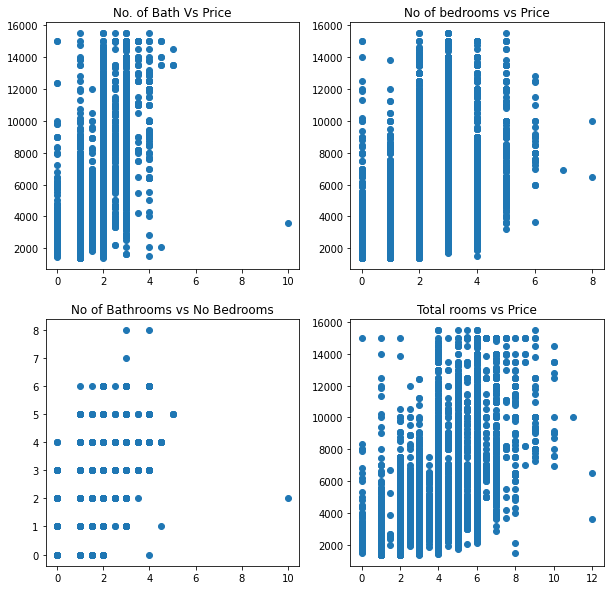

In [80]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize = (10,10))
axs[0, 0].scatter(df['bathrooms'], df['price'])
axs[0, 0].set_title('No. of Bath Vs Price')
axs[0, 1].scatter(df['bedrooms'], df['price'])
axs[0, 1].set_title('No of bedrooms vs Price')
axs[1, 0].scatter(df['bathrooms'], df['bedrooms'])
axs[1, 0].set_title('No of Bathrooms vs No Bedrooms')
axs[1, 1].scatter(df['total rooms'], df['price'])
axs[1, 1].set_title('Total rooms vs Price');


## 2. Split into Feature-Target Matrices

In [83]:
target ='price'
y = df[target]
X = df[['bedrooms']]#.reshape(-1,1)

y.shape, X.shape

((48818,), (48818, 1))

## 3. Establish Baseline

### 3.1 baseline

In [84]:
baseline = df['price'].mean() # or y.mean()
baseline

3579.5609816051456

### 3.2 MAE of the baseline value

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

baseline_MAE = mean_absolute_error(y, [baseline]*len(y))
print(f"Baseline _MAE is: {baseline_MAE}")

Baseline _MAE is: 1201.5251847945751


In [93]:
baseline_MSE = mean_squared_error(y, [baseline]*len(y))
baseline_MSE

3106063.7154934197

#$ 4. Build a Model

### 4.1 Import predictor

In [89]:
from sklearn.linear_model import LinearRegression

### 4.2 Instantiate your predictor

In [90]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4.3 Train your model with the data (fit)

In [91]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4.4 Predict

In [92]:
y_pred = model.predict(X)
y_pred

array([4827.73665176, 3974.48248423, 3121.22831671, ..., 3121.22831671,
       2267.97414918, 3974.48248423])

## 5. Check Metrics

In [94]:
prediction_MAE = mean_absolute_error(y, y_pred)
prediction_MAE

975.6559731054491

In [95]:
prediction_MSE = mean_squared_error(y, y_pred)
prediction_MSE

2215388.9330691006

In [96]:
# Did you do better than baseline
if prediction_MAE < baseline_MAE and prediction_MSE < baseline_MSE :
  print("Yay!")
else:
  print("Ooopss")

Yay!


## 6. Interpreting Model

### 6.1 coefficients

In [98]:
model.coef_[0]

853.2541675274308

### 6.2 intercept

In [100]:
model.intercept_

2267.9741491780505

### 6.3 Visualize

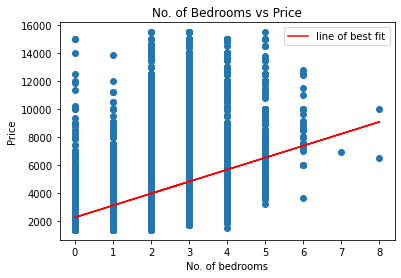

In [105]:
plt.scatter(df['bedrooms'], df['price'])
plt.plot(X, y_pred, color = 'r', label = 'line of best fit')
plt.legend()
plt.title('No. of Bedrooms vs Price')
plt.xlabel('No. of bedrooms')
plt.ylabel('Price');

# Multiple Features

## 4.2. Model 2




4.2.1 Feature and target Matrices

In [107]:
X2= df[['bedrooms', 'bathrooms', 'total rooms']]
y2 = df.price

X2.shape, y2.shape

((48818, 3), (48818,))

### 4.2.2 Build a Model, fit, predict

In [109]:
model2 = LinearRegression()
model2.fit(X2,y2)
y2_pred = model2.predict(X2)
y2_pred

array([4779.56098161, 3338.56098161, 2945.56098161, ..., 2945.56098161,
       2553.06098161, 3338.56098161])

### 4.2.3 Metrics

In [111]:
model2_MAE = mean_absolute_error(y, y2_pred)
model2_MSE = mean_squared_error(y, y2_pred)

model2_MAE, model2_MSE

(821.9956038982698, 1507355.49679072)

In [112]:
# Did you do better than baseline
if model2_MAE < baseline_MAE and model2_MSE < baseline_MSE :
  print("Yay!")
else:
  print("Ooopss")

Yay!


In [113]:
# Get coefficients

model2.coef_

array([ 2.40921683e+15,  2.40921683e+15, -2.40921683e+15])

In [114]:
# get intercept
model2.intercept_

455.56098160514557